In [ ]:
pip install gensim scikit-learn

In [ ]:
pip install tensorflow

In [1]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import joblib

In [ ]:
pip install wget

In [ ]:
!wget -O dataset_product.csv 'https://raw.githubusercontent.com/berUang-Capstone/ML/main/Dataset/Dataset.csv'


In [2]:
data = pd.read_csv('../Dataset/Dataset.csv')

In [3]:
data.head()

,Nama Product,Categories,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Kamera belakang,Belanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kamera dashboard,Belanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Car cover,Belanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cover motor,Belanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sabun mobil,Belanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Nama Product', 'Categories', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)

In [6]:
data.columns

Index(['Nama Product', 'Categories'], dtype='object')

In [7]:
duplicated_rows = data[data.duplicated()]

# Menampilkan duplikasi
print(duplicated_rows)

                   Nama Product    Categories
203                 Lampu pintu       Belanja
338                     Tagihan       Belanja
451            Nominal transfer       Belanja
455               Nama penerima       Belanja
456               Nama pengirim       Belanja
...                         ...           ...
4494  Somba Opu Shopping Street  Transportasi
4495            Paotere Harbour  Transportasi
4496          Benteng Somba Opu  Transportasi
4497             Pulau Samalona  Transportasi
4498             Lae Lae Island  Transportasi

[572 rows x 2 columns]


In [8]:
data = data.drop_duplicates()

In [9]:
category_counts = data['Categories'].value_counts()
print(category_counts)

Transportasi    1358
Food            1319
Belanja         1250
Name: Categories, dtype: int64


In [10]:
def remove_vowels_regex(string):
    return re.sub(r'[aeiouAEIOU]', '', string)

In [11]:
belanja = data[data['Categories'] == "Belanja"]
food = data[data['Categories'] == "Food"]
trans = data[data['Categories'] == "Transportasi"]

acronym = food['Nama Product'].apply(remove_vowels_regex)
acronym_df = pd.DataFrame({
    'Nama Product': acronym,
    'Categories': ['Food'] * len(acronym)  # Mengisi semua baris dengan kategori 'Food'
})

data = pd.concat([belanja,belanja,trans.head(1100), food, trans ,acronym_df], ignore_index=True)
# acronym_df
data

,Nama Product,Categories
0,Kamera belakang,Belanja
1,Kamera dashboard,Belanja
2,Car cover,Belanja
3,Cover motor,Belanja
4,Sabun mobil,Belanja
...,...,...
7591,ym Grng Ny. Shrt,Food
7592,Bkm Jw Mbh M,Food
7593,Pcl B Ks,Food
7594,St Klthk Pk Png,Food


In [12]:
category_counts = data['Categories'].value_counts()
print(category_counts)

Food            2638
Belanja         2500
Transportasi    2458
Name: Categories, dtype: int64


In [ ]:
filtered_df = data[data['Nama Product'].str.contains("Promo tiket pesawat Traveloka", case=False, na=False)]
filtered_df

In [13]:
def clean_product_name(product_name):
    return re.sub(r'[()\-,.]', '', product_name)  # Membersihkan data menggunakan regex

# Mengaplikasikan fungsi clean_product_name ke setiap elemen dalam kolom 'Nama Product'
data['Nama Product'] = [clean_product_name(product_name) for product_name in data['Nama Product']]

In [14]:
vocab = data['Nama Product']
vocab = [text.lower() for text in vocab]

In [15]:
print(vocab)

['kamera belakang', 'kamera dashboard', 'car cover', 'cover motor', 'sabun mobil', 'sabun motor', 'wax', 'pembersih kaca', 'pengharum mobil', 'pengharum motor', 'kursi bayi', 'pengisi daya usb', 'pompa ban', 'pembersih velg', 'pembersih dashboard', 'bagasi', 'roof rack', 'tali pengikat', 'tangki bensin', 'filter oli', 'filter udara', 'filter bensin', 'kursi lipat', 'gorden mobil', 'penyedot debu mobil', 'ac mobil', 'kipas angin mobil', 'penutup jok', 'peredam suara', 'kap mesin', 'fender', 'grille', 'plat nomor', 'lampu kabut', 'led strip', 'aksesoris dashboard', 'pijakan kaki', 'footstep', 'rak helm', 'helm cadangan', 'penutup knalpot', 'lampu rem', 'lampu plat nomor', 'mata kucing', 'lampu hazard', 'soket pemantik', 'power outlet', 'penghangat jok', 'kipas penyejuk', 'talang air', 'sun visor', 'penutup stir', 'kursi ortopedi', 'pengukur suhu', 'penyemprot air', 'cover dashboard', 'sistem audio', 'speaker', 'subwoofer', 'amplifier', 'equalizer', 'monitor kepala', 'monitor sandaran', '

In [ ]:
import nlpaug.augmenter.word as naw

# Contoh augmentasi data teks
aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = [aug.augment(text) for text in vocab]

print(augmented_texts)


In [ ]:
data_aug = pd.DataFrame(vocab)
aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = [aug.augment(text) for text in data_aug[0]]

# data

In [ ]:
pd.DataFrame(augmented_texts)

In [16]:
labels = data['Categories']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(integer_encoded, num_classes=3)
# all_text = vocab + augmented_texts
# all_labels = one_hot_labels + one_hot_labels

In [17]:
vocab_size = 4000
max_length = 10
# embedding_dim = 100
trunc_type='post'
oov_tok = "<OOV>"

In [18]:
tokenizer = Tokenizer(num_words = vocab_size , oov_token=oov_tok)
tokenizer.fit_on_texts(vocab)
word_index  = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(vocab)
padded_sequences = pad_sequences(sequences, padding=trunc_type,maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(vocab)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

print(word_index)
print(sequences)


{'<OOV>': 1, 'tiket': 2, 'kmp': 3, 'stasiun': 4, 'bandara': 5, 's': 6, 'es': 7, 'th': 8, 'buah': 9, 'lampu': 10, 'terminal': 11, 'kereta': 12, 'st': 13, 'soto': 14, 'diskon': 15, 'promo': 16, 'krim': 17, 'layanan': 18, 'krm': 19, 'pesawat': 20, 'pelabuhan': 21, 'biaya': 22, 'bh': 23, 'harga': 24, 'teh': 25, 'pembayaran': 26, 'gocar': 27, 'nomor': 28, 'online': 29, 'tarif': 30, 'grab': 31, 'ss': 32, 'maxim': 33, 'kacang': 34, 'gojek': 35, 'taxi': 36, 'sayur': 37, 'syr': 38, 'tahu': 39, 'ns': 40, 'nasi': 41, 'rute': 42, 'jadwal': 43, 'traveloka': 44, 'nusantara': 45, 'saus': 46, 'bus': 47, 'bis': 48, 'kai': 49, 'ayam': 50, 'api': 51, 'busway': 52, 'lrt': 53, 'k': 54, 'jarak': 55, 'fasilitas': 56, 'krl': 57, 'mrt': 58, 'air': 59, 'susu': 60, 'daun': 61, 'kcng': 62, 'lontong': 63, 'lntng': 64, 'kue': 65, 'ym': 66, 'parkir': 67, 'kode': 68, 'waktu': 69, 'belanja': 70, 'nama': 71, 'ikan': 72, 'keberangkatan': 73, 'daging': 74, 'pemesanan': 75, 'sulawesi': 76, 'kartu': 77, 'malam': 78, 'antar

In [19]:
padded_sequences

array([[  98,  639,    0, ...,    0,    0,    0],
       [  98,  276,    0, ...,    0,    0,    0],
       [ 640,  277,    0, ...,    0,    0,    0],
       ...,
       [ 407,  329, 3777, ...,    0,    0,    0],
       [  13, 3778,  219, ...,    0,    0,    0],
       [ 191,   96,  611, ...,    0,    0,    0]])

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=123 ,shuffle=True , stratify=labels)

In [73]:
model = Sequential([
          tf.keras.layers.Embedding(vocab_size, 100, input_length=max_length),
          tf.keras.layers.GlobalAveragePooling1D(),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [74]:
num_epochs = 50

# Train the model
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels))

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4971 - loss: 0.9716 - val_accuracy: 0.8724 - val_loss: 0.3277
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9134 - loss: 0.2382 - val_accuracy: 0.9355 - val_loss: 0.2015
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9617 - loss: 0.1124 - val_accuracy: 0.9289 - val_loss: 0.1884
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9822 - loss: 0.0569 - val_accuracy: 0.9211 - val_loss: 0.1748
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9822 - loss: 0.0462 - val_accuracy: 0.8947 - val_loss: 0.3084
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9841 - loss: 0.0355 - val_accuracy: 0.9368 - val_loss: 0.1777
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9841 - loss: 0.0411 - val_accuracy: 0.9309 - val_loss: 0.1834
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9847 - loss: 0.0324 - val_accuracy: 0.

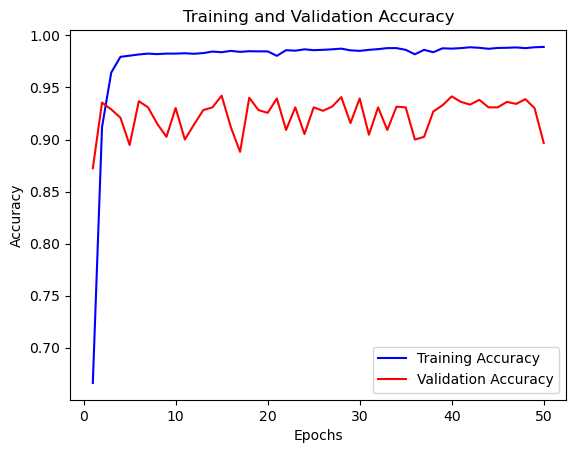

In [75]:
# Mengakses history dari model
history = model.history.history

# Menyimpan akurasi dari data training dan data validasi
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Mengakses epoch
epochs = range(1, len(accuracy) + 1)

# Plotting akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pip install keras-tuner --upgrade

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout ,SpatialDropout1D,GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner

def build_model(hp):
    model2 = Sequential()
    model2.add(
        Embedding(
            input_dim=vocab_size, 
            output_dim=hp.Int("output_dim", min_value=50, max_value=500, step=50), 
            input_length=max_length
        )
    )
    model2.add(SpatialDropout1D(0.5))
    model2.add(
        LSTM(
            units=hp.Choice("units",[32,64,128,256,512]),
            kernel_regularizer=l2(0.01),
            recurrent_dropout=0.2 ,
            dropout=0.2,
            return_sequences=True
        )
    )
    if hp.Boolean("dropout"):
        model2.add(Dropout(rate=hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)))
    model2.add(
        LSTM(
            units=hp.Choice("units_1", [32,64,128,256,512]),
            kernel_regularizer=l2(0.01),
            return_sequences=False
        )
    )
    if hp.Boolean("dropout_1"):
        model2.add(Dropout(rate=hp.Float("dropout_rate1", min_value=0.1, max_value=0.5, step=0.1)))
        
    # model2.add(Dense(units=hp.Choice("units_2", [32,64,128,256,512]), activation='relu'))

    # model2.add(Dense(units=hp.Choice("units_3", [32,64,128,256,512]), activation='relu')) 

    # if hp.Boolean("dropout_3"):
    #     model2.add(Dropout(rate=hp.Float("dropout_rate3", min_value=0.1, max_value=0.5, step=0.1)))

    model2.add(Dense(3, activation='softmax')) 

    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model2


In [24]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10)

Reloading Tuner from .\untitled_project\tuner0.json


In [85]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

tuner.search(train_data, train_labels, validation_data=(test_data, test_labels), epochs=50, batch_size=32,callbacks=[early_stopping])
best_model = tuner.get_best_models()[0]

Trial 10 Complete [00h 03m 23s]
val_accuracy: 0.9302631616592407

Best val_accuracy So Far: 0.9342105388641357
Total elapsed time: 00h 41m 10s


c:\Users\sapyy\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [86]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 400)        │     1,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 10, 400)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 512)        │     1,869,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        69,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,539,683 (13.50 MB)

 Trainable params: 3,539,683 (13.50 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model2 = tuner.hypermodel.build(best_hps)
history = model2.fit(train_data, train_labels, epochs=50, validation_data=(test_data, test_labels))

Epoch 1/50


c:\Users\sapyy\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


190/190 ━━━━━━━━━━━━━━━━━━━━ 31s 110ms/step - accuracy: 0.4883 - loss: 4.1398 - val_accuracy: 0.7934 - val_loss: 0.6137
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8477 - loss: 0.5125 - val_accuracy: 0.8803 - val_loss: 0.3912
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9335 - loss: 0.2975 - val_accuracy: 0.9138 - val_loss: 0.3317
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9587 - loss: 0.2107 - val_accuracy: 0.8954 - val_loss: 0.3924
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9705 - loss: 0.1520 - val_accuracy: 0.9105 - val_loss: 0.3416
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9750 - loss: 0.1596 - val_accuracy: 0.9217 - val_loss: 0.2777
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9757 - loss: 0.1359 - val_accuracy: 0.9191 - val_loss: 0.3283
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9734 - loss: 0.1470 - val

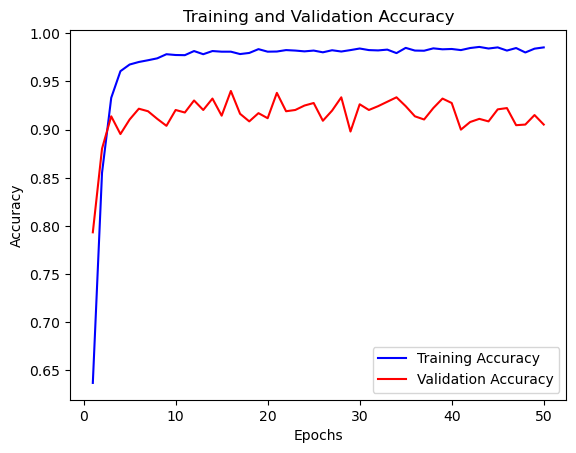

In [26]:
# Mengakses history dari model
history = model2.history.history

# Menyimpan akurasi dari data training dan data validasi
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Mengakses epoch
epochs = range(1, len(accuracy) + 1)

# Plotting akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
loss, accuracy = model2.evaluate(test_data, test_labels)
print(f'Test Accuracy: {accuracy}')
# print(f'Test Validation_Accuracy: {val_accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9110 - loss: 0.2863
Test Accuracy: 0.9052631855010986


In [29]:
# Text input
text_input = 'IDM gula PSR'

# Ubah teks input menjadi sequence angka menggunakan tokenizer
sequence = tokenizer.texts_to_sequences([text_input])

# Tambahkan padding pada sequence
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Lakukan prediksi menggunakan model
predictions = model2.predict(padded_sequence)

# Output prediksi (nilai probabilitas dari lapisan softmax)
# print("Predicted probabilities:", predictions[0])

treshold = 0.5

# Memeriksa apakah probabilitas tertinggi kurang dari treshold
if np.max(predictions) < treshold:
    predicted_class = "other"
else:
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = label_encoder.inverse_transform(predicted_class_index)[0]
    # print(predicted_class)

# Output prediksi kelas
print("Predicted Class:", predicted_class)

probabilities_rounded = [round(prob, 4) for prob in predictions[0]]
print("Predicted probabilities:", probabilities_rounded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Class: Belanja
Predicted probabilities: [0.5597, 0.4241, 0.0163]


In [31]:
model2.save('model.h5')

In [33]:
with open('tokenizer.joblib', 'wb') as f:
    joblib.dump(tokenizer, f)

In [34]:
with open('label_encoder.joblib', 'wb') as f:
    joblib.dump(label_encoder, f)